In [1]:
## Importo librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Comienzo leyendo el archimo "coursera_reviews"
reviews= pd.read_csv('Coursera_reviews.csv')

In [3]:
## Reviso los primeros registros
reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [4]:
## Veo sus dimensiones
reviews.shape

(1454711, 5)

In [5]:
## Ahora el tipo de datos
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [6]:
## voy a chequear si hay reviews, en el texto, duplicadas
reviews['reviews'].duplicated().sum()

996433

In [7]:
## Obtengo una tupla aleatoria, para chequear xq es mucha cantidad
df = reviews.loc[reviews['reviews'].duplicated(keep=False),'reviews']
df
df = df.groupby(df).apply(lambda x: tuple(x.index)).tolist()
df[5000]

(1230464, 1230489, 1230514)

In [18]:
reviews.loc[[385902,385927, 385952],['reviews', 'reviewers', 'date_reviews', 'rating','course_id']]

,reviews,reviewers,date_reviews,rating,course_id
385902,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nEste\nes u...,By Jesus M,"Feb 25, 2020",5,pap
385927,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nEste\nes u...,By Jesus M,"Feb 25, 2020",5,pap
385952,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nEste\nes u...,By Jesus M,"Feb 25, 2020",5,pap


In [19]:
## voy a hacer otras comprobaciones porque son muchos
reviews.loc[[1133879,1133904, 1133929],['reviews', 'reviewers', 'date_reviews', 'rating','course_id']]

,reviews,reviewers,date_reviews,rating,course_id
1133879,"\nExcellent course, really interesting. Progre...",By Joaquin S R M,"Jul 17, 2016",5,progfun1
1133904,"\nExcellent course, really interesting. Progre...",By Joaquin S R M,"Jul 17, 2016",5,progfun1
1133929,"\nExcellent course, really interesting. Progre...",By Joaquin S R M,"Jul 17, 2016",5,progfun1


In [20]:
reviews.loc[[1230464,1230489, 1230514],['reviews', 'reviewers', 'date_reviews', 'rating','course_id']]

,reviews,reviewers,date_reviews,rating,course_id
1230464,3rd course completed on Coursera. Two out of t...,By Kamal J,"May 17, 2020",5,leadership-21st-century
1230489,3rd course completed on Coursera. Two out of t...,By Kamal J,"May 17, 2020",5,leadership-21st-century
1230514,3rd course completed on Coursera. Two out of t...,By Kamal J,"May 17, 2020",5,leadership-21st-century


In [8]:
reviews.drop_duplicates(subset='reviews', inplace=True)
reviews.shape

(458278, 5)

In [10]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words_no = set(stopwords.words('english')+ ["course","using","Using", "learn", "tough", "Stanford", "Introduction", "First", "Step","Skills", "Essentials", "Crash", "mental", "tools", "master", "Everyone","World","tuning","Networks","Structures","Well", "Optimization","Infraestructure", "Healt","Fundamentals", "Becoming", "Beginners","subjects", "Programming", "Getting", "Started", "help","Powerfull","Everybody", "Aprendiendo" ,"Infraestructure","Platform", "Punctuation"])

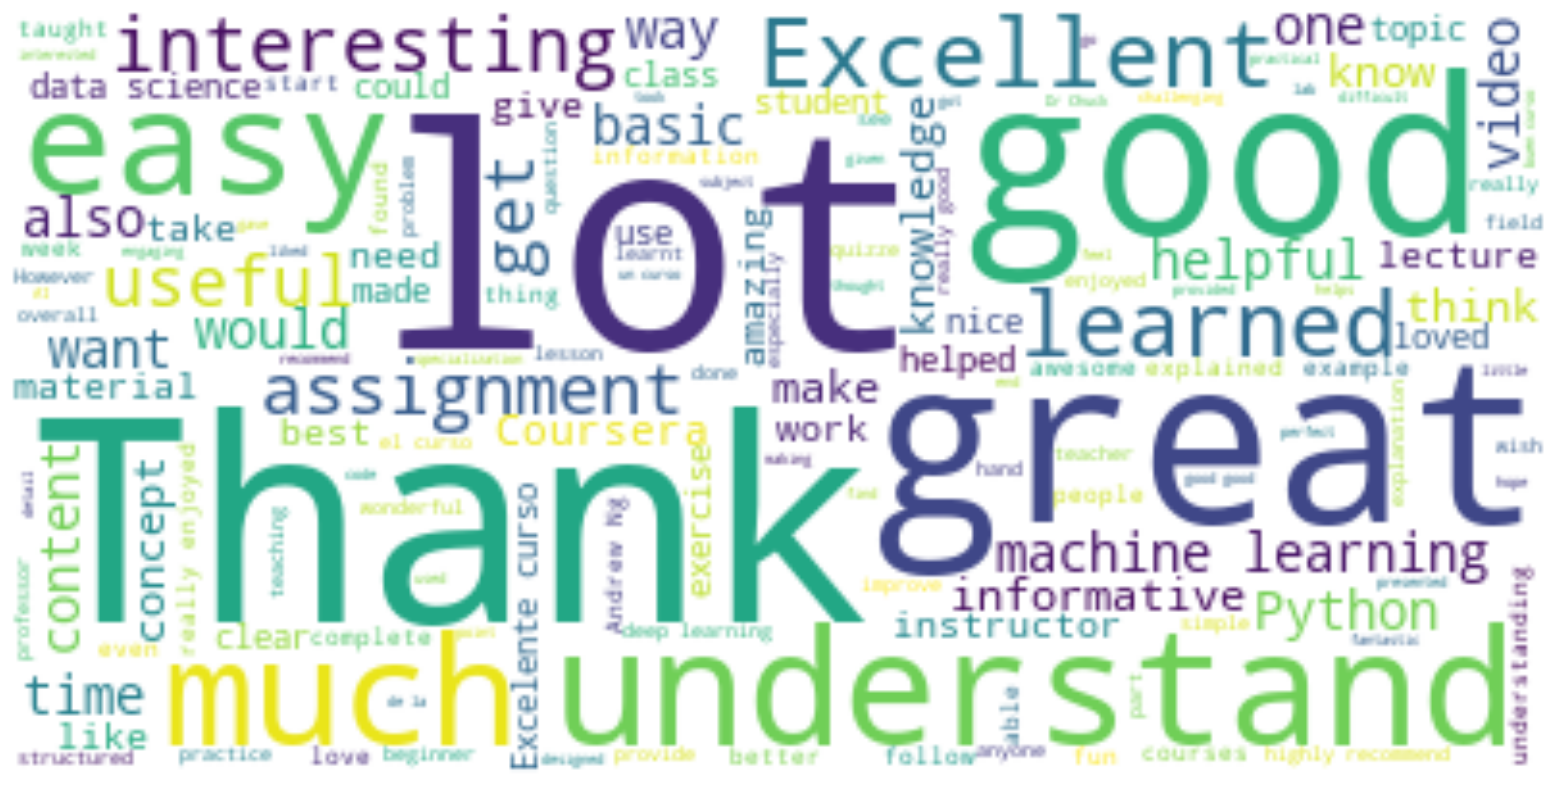

In [11]:
## Realizo un WordCloud para visualizar la importancia de las palabras en el nombre del curso

stopwords = stop_words_no

description_plain_text = reviews['reviews'].str.cat(sep=' ')
cloud_prueba = WordCloud(background_color = "white", stopwords = stopwords).generate(description_plain_text)
plt.figure(figsize=(20,10))
plt.imshow(cloud_prueba, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
## Aca vemos las palabras mas destacadas en los comentarios que son:
## Course, Lot, Great Course, Learn, Thank, Understand, much, Excellent course

## Es decir qur se deduce que predominan las palabras positivas 

In [9]:
## le agrego la columna q me servira para el analisis
reviews['plataforma']= 'coursera'

In [10]:
reviews.head()

,reviews,reviewers,date_reviews,rating,course_id,plataforma
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,coursera
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,coursera
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,coursera
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,coursera
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,coursera


In [11]:
## exporto a csv
reviews.to_csv ('reviews_limpio.csv', index= False)